In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, RANSACRegressor, HuberRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error

Só vamos usar nesse notebook os dados escalonados

In [2]:
df = pd.read_csv('./melting-point/train_scaled.csv')

In [3]:
melting_point={}
melting_point["data"] = df.drop(['Tm'], axis=1).values
melting_point["target"] = df["Tm"].values

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(melting_point["data"], melting_point["target"], test_size=0.1)

# Regressor Linear

In [5]:
lr = LinearRegression()

lr.fit(X_train, Y_train)
pred = lr.predict(X_test)

print("R2 score:", lr.score(X_test, Y_test))
print("Mean Absolute error:", mean_absolute_error(Y_test, pred))

R2 score: 0.6400415384178433
Mean Absolute error: 33.22711496566913


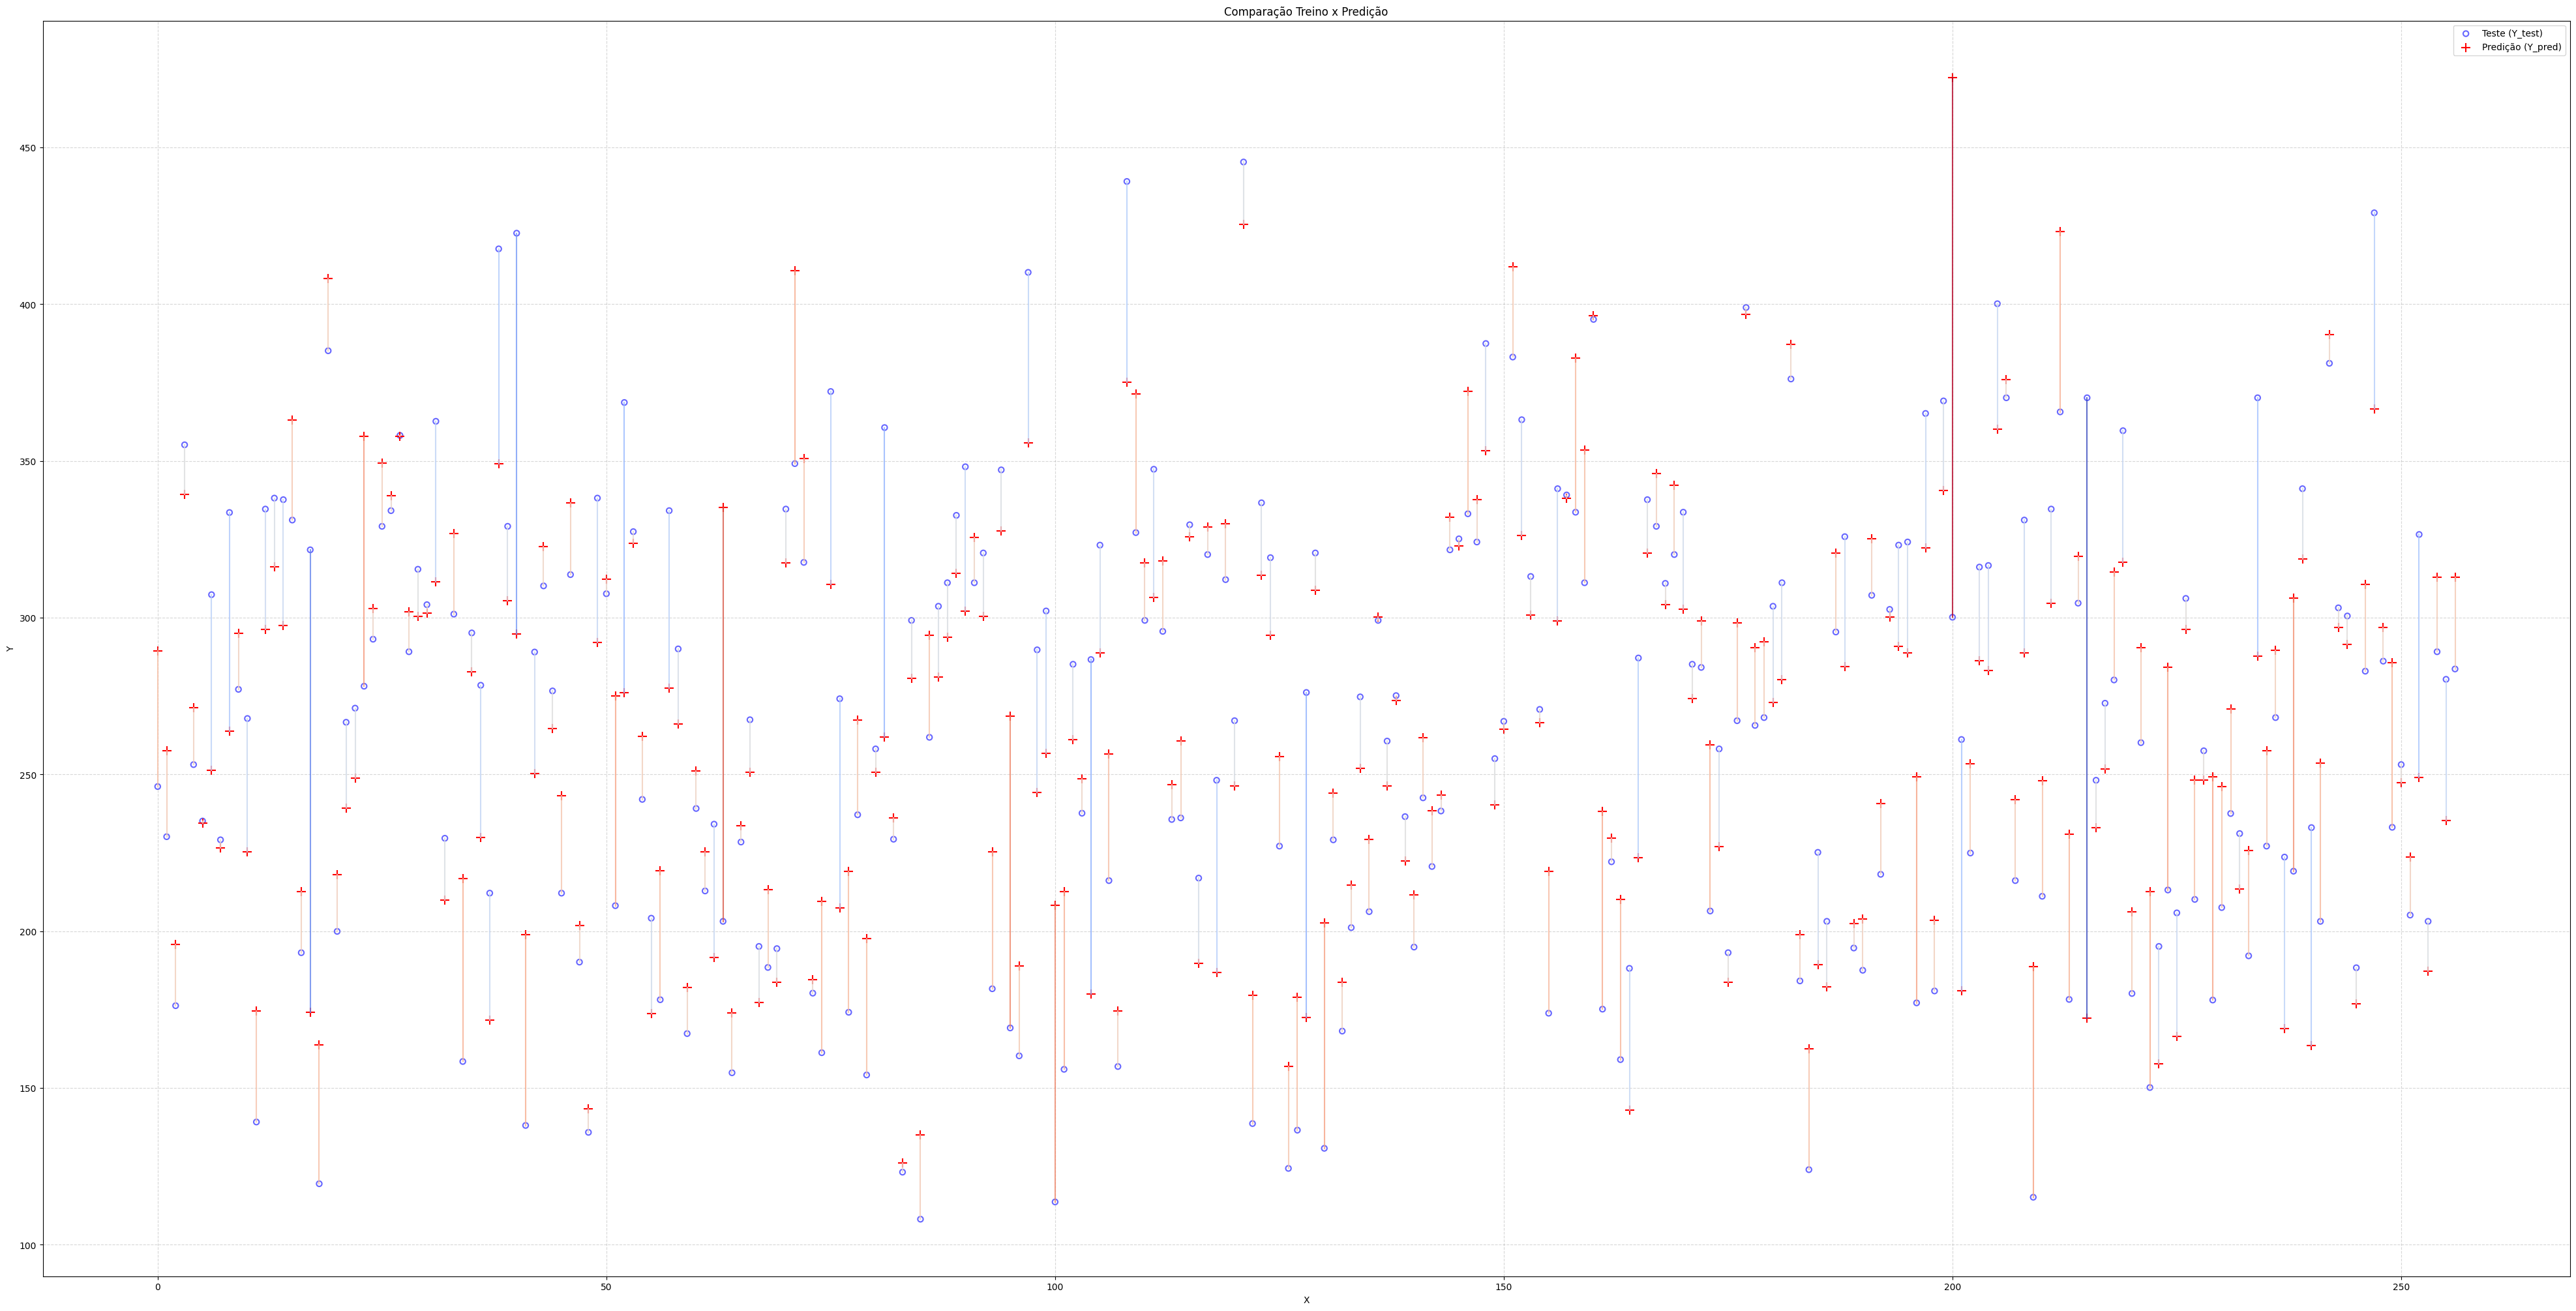

In [6]:
plt.figure(figsize=(50, 25))
x_range = np.arange(0, len(X_test), 1)
plt.scatter(x_range, Y_test, color='blue', alpha=0.6, label='Teste (Y_test)', facecolors='none', edgecolors='blue', linewidths=1.5)
plt.scatter(x_range, pred, color='red', marker='+', label='Predição (Y_pred)', s=100)

diff = pred - Y_test

norm = Normalize(vmin=np.min(diff), vmax=np.max(diff))
cmap = plt.cm.coolwarm  # azul pra negativo, vermelho pra positivo

for x, y_real, y_est, d in zip(x_range, Y_test, pred, diff):
    cor = cmap(norm(d))
    plt.plot([x, x], [y_real, y_est], color=cor, linewidth=1.5, alpha=0.8)

plt.title("Comparação Treino x Predição")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig("LinearRegressionResult.png", dpi=300, bbox_inches='tight')
plt.show()

In [7]:
lr_scores = cross_val_score(lr, melting_point["data"], melting_point["target"], cv=10, scoring='neg_mean_absolute_error')
print(lr_scores)
print(lr_scores.mean())
print(lr_scores.std())

[-32.64475049 -29.71429818 -35.70079003 -28.20917693 -31.82322502
 -31.87803109 -32.84814303 -30.91372543 -34.17054009 -31.03998102]
-31.894266131796748
2.029109939426543


# Ridge Regression

In [8]:
rg = RidgeCV(alphas=(1000.0, 100.0, 50.0, 10.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0.1, 0.01, 0.05, 0.005, 0.0025, 0.001, 0.00025), cv=10)

rg.fit(X_train, Y_train)
pred = rg.predict(X_test)

print(rg.alpha_)
print("R2 score:", rg.score(X_test, Y_test))
print("Mean Absolute error:", mean_absolute_error(Y_test, pred))

100.0
R2 score: 0.6278697505216295
Mean Absolute error: 33.72813850437482


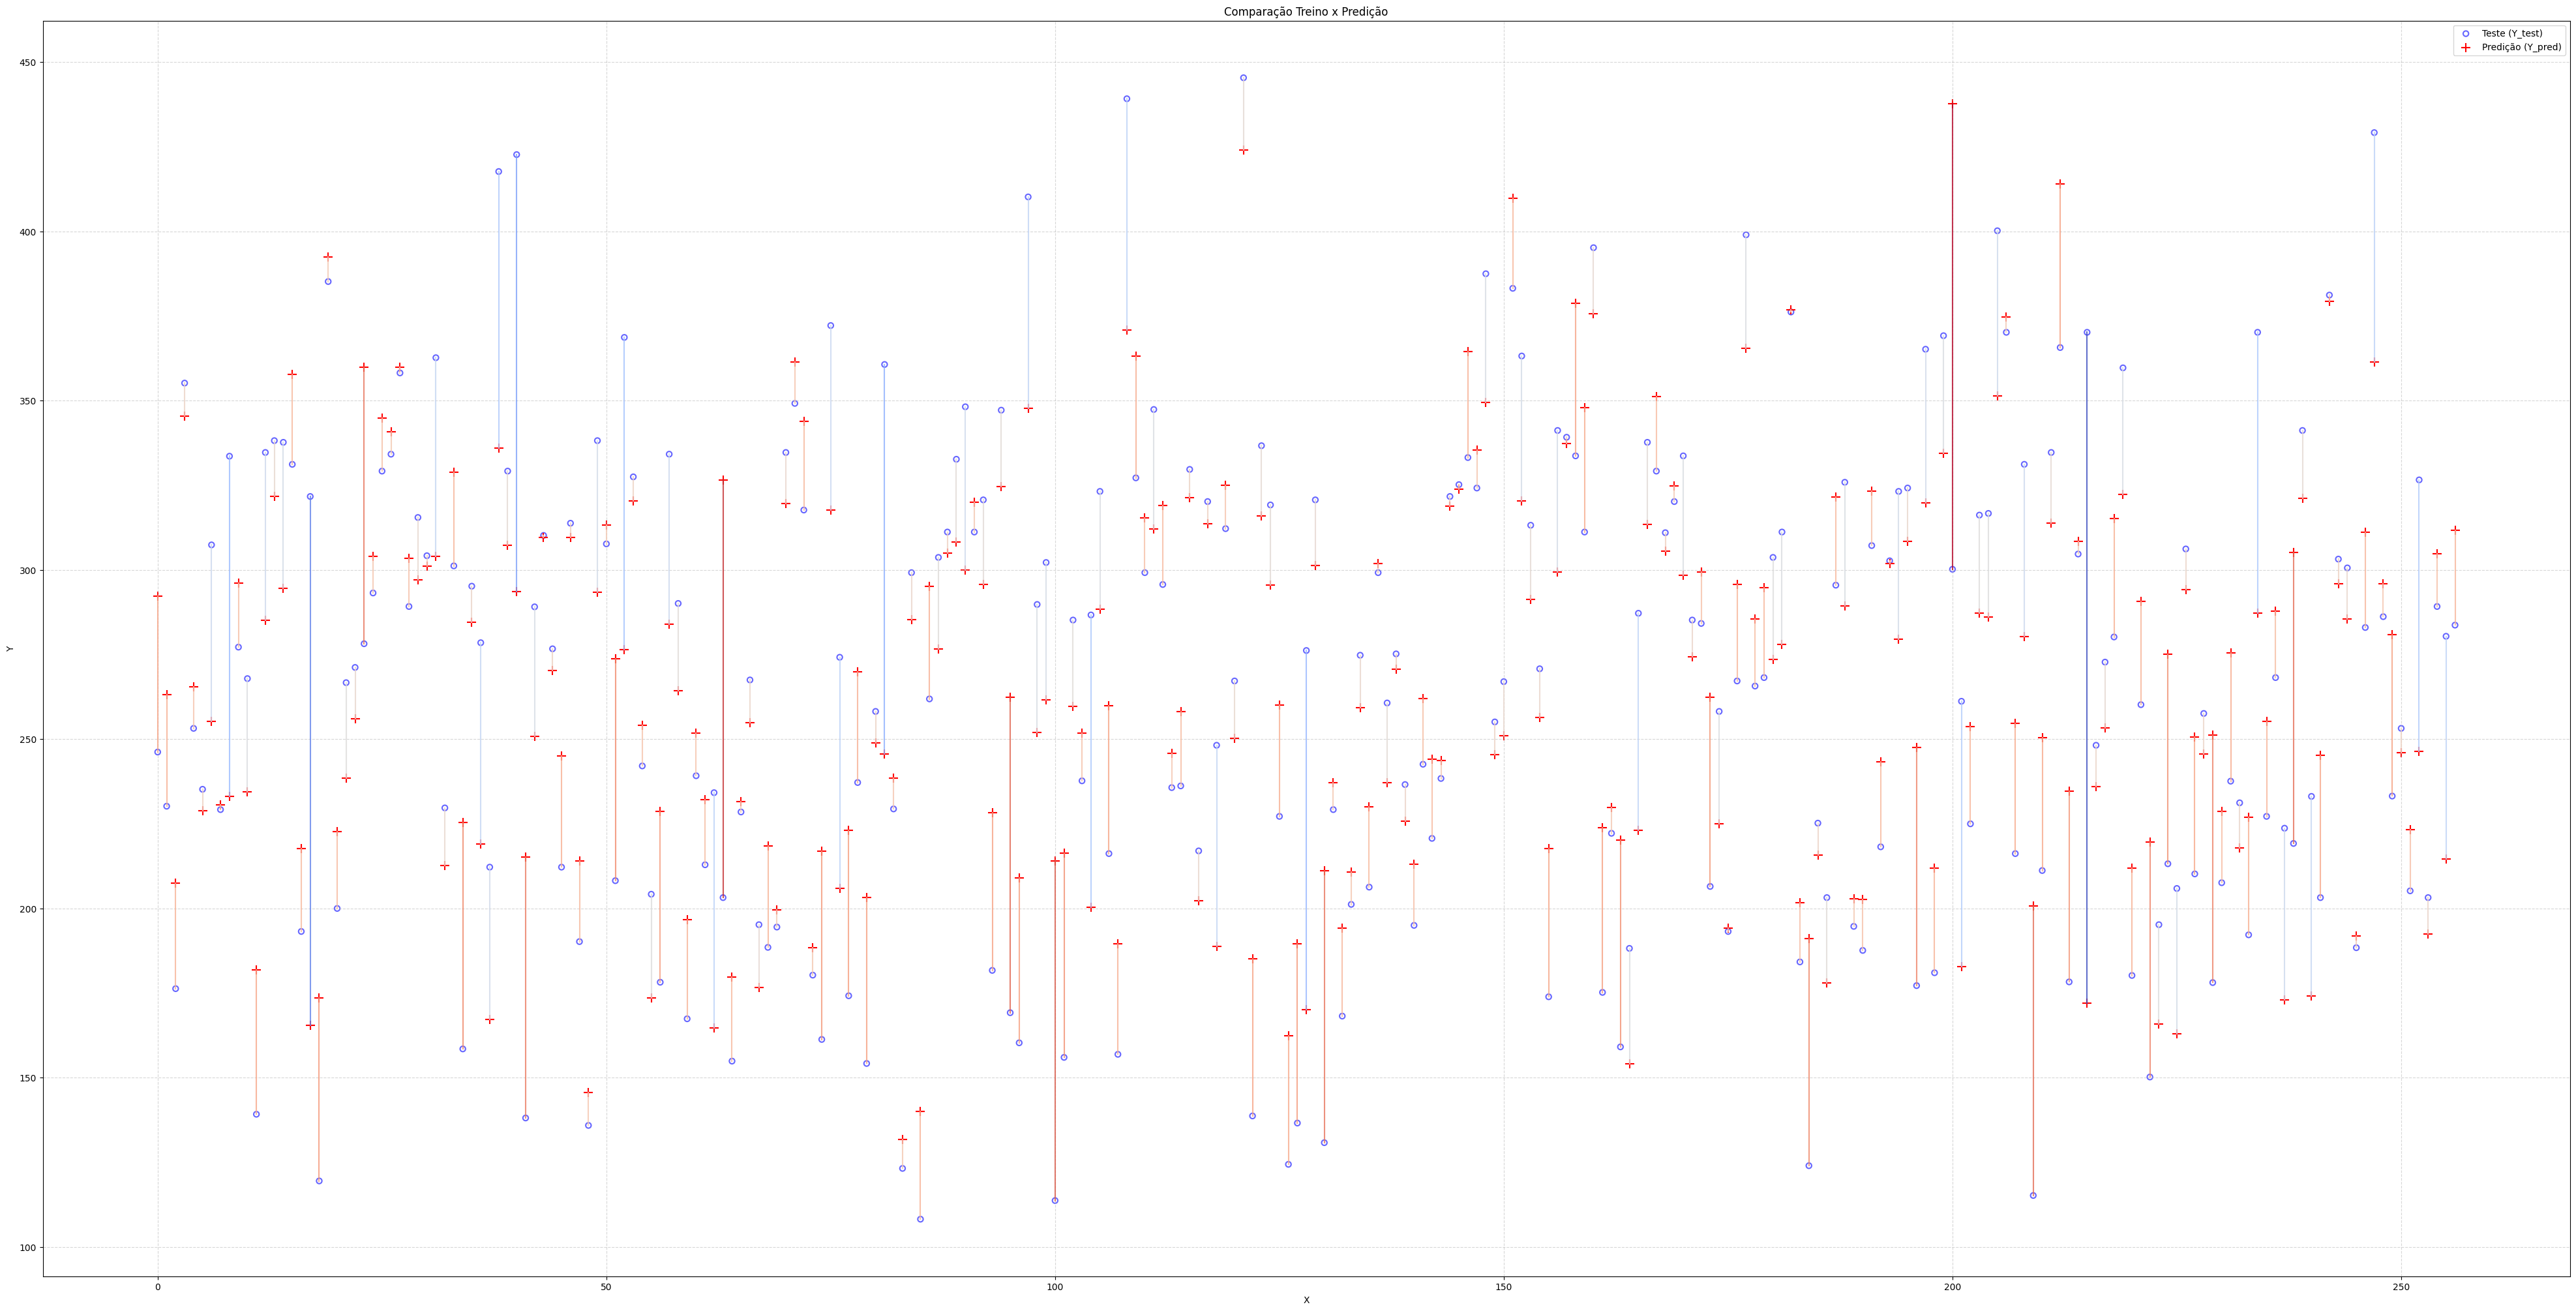

In [9]:
plt.figure(figsize=(50, 25))
x_range = np.arange(0, len(X_test), 1)
plt.scatter(x_range, Y_test, color='blue', alpha=0.6, label='Teste (Y_test)', facecolors='none', edgecolors='blue', linewidths=1.5)
plt.scatter(x_range, pred, color='red', marker='+', label='Predição (Y_pred)', s=100)

diff = pred - Y_test

norm = Normalize(vmin=np.min(diff), vmax=np.max(diff))
cmap = plt.cm.coolwarm  # azul pra negativo, vermelho pra positivo

for x, y_real, y_est, d in zip(x_range, Y_test, pred, diff):
    cor = cmap(norm(d))
    plt.plot([x, x], [y_real, y_est], color=cor, linewidth=1.5, alpha=0.8)

plt.title("Comparação Treino x Predição")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig("RidgeResult.png", dpi=300, bbox_inches='tight')
plt.show()

In [10]:
rg_scores = cross_val_score(rg, melting_point['data'], melting_point['target'], cv=10, scoring="neg_mean_absolute_error")
print(rg_scores)
print(rg_scores.mean())
print(rg_scores.std())

[-32.34804298 -30.17232619 -35.17449644 -28.73468613 -31.77942022
 -32.36377485 -33.83292287 -31.35414871 -34.43744982 -30.65471437]
-32.08519825938677
1.8930745663789013


# Lasso Regression

In [11]:
ls = LassoCV(alphas=(1000.0, 100.0, 50.0, 10.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0.1, 0.01, 0.005, 0.0025, 0.001, 0.00025), cv=10, max_iter=10000)

ls.fit(X_train, Y_train)
pred = ls.predict(X_test)

print(ls.alpha_)
print("R2 score:", ls.score(X_test, Y_test))
print("Mean Absolute error:", mean_absolute_error(Y_test, pred))

0.1
R2 score: 0.6390379729600415
Mean Absolute error: 33.13279636072692


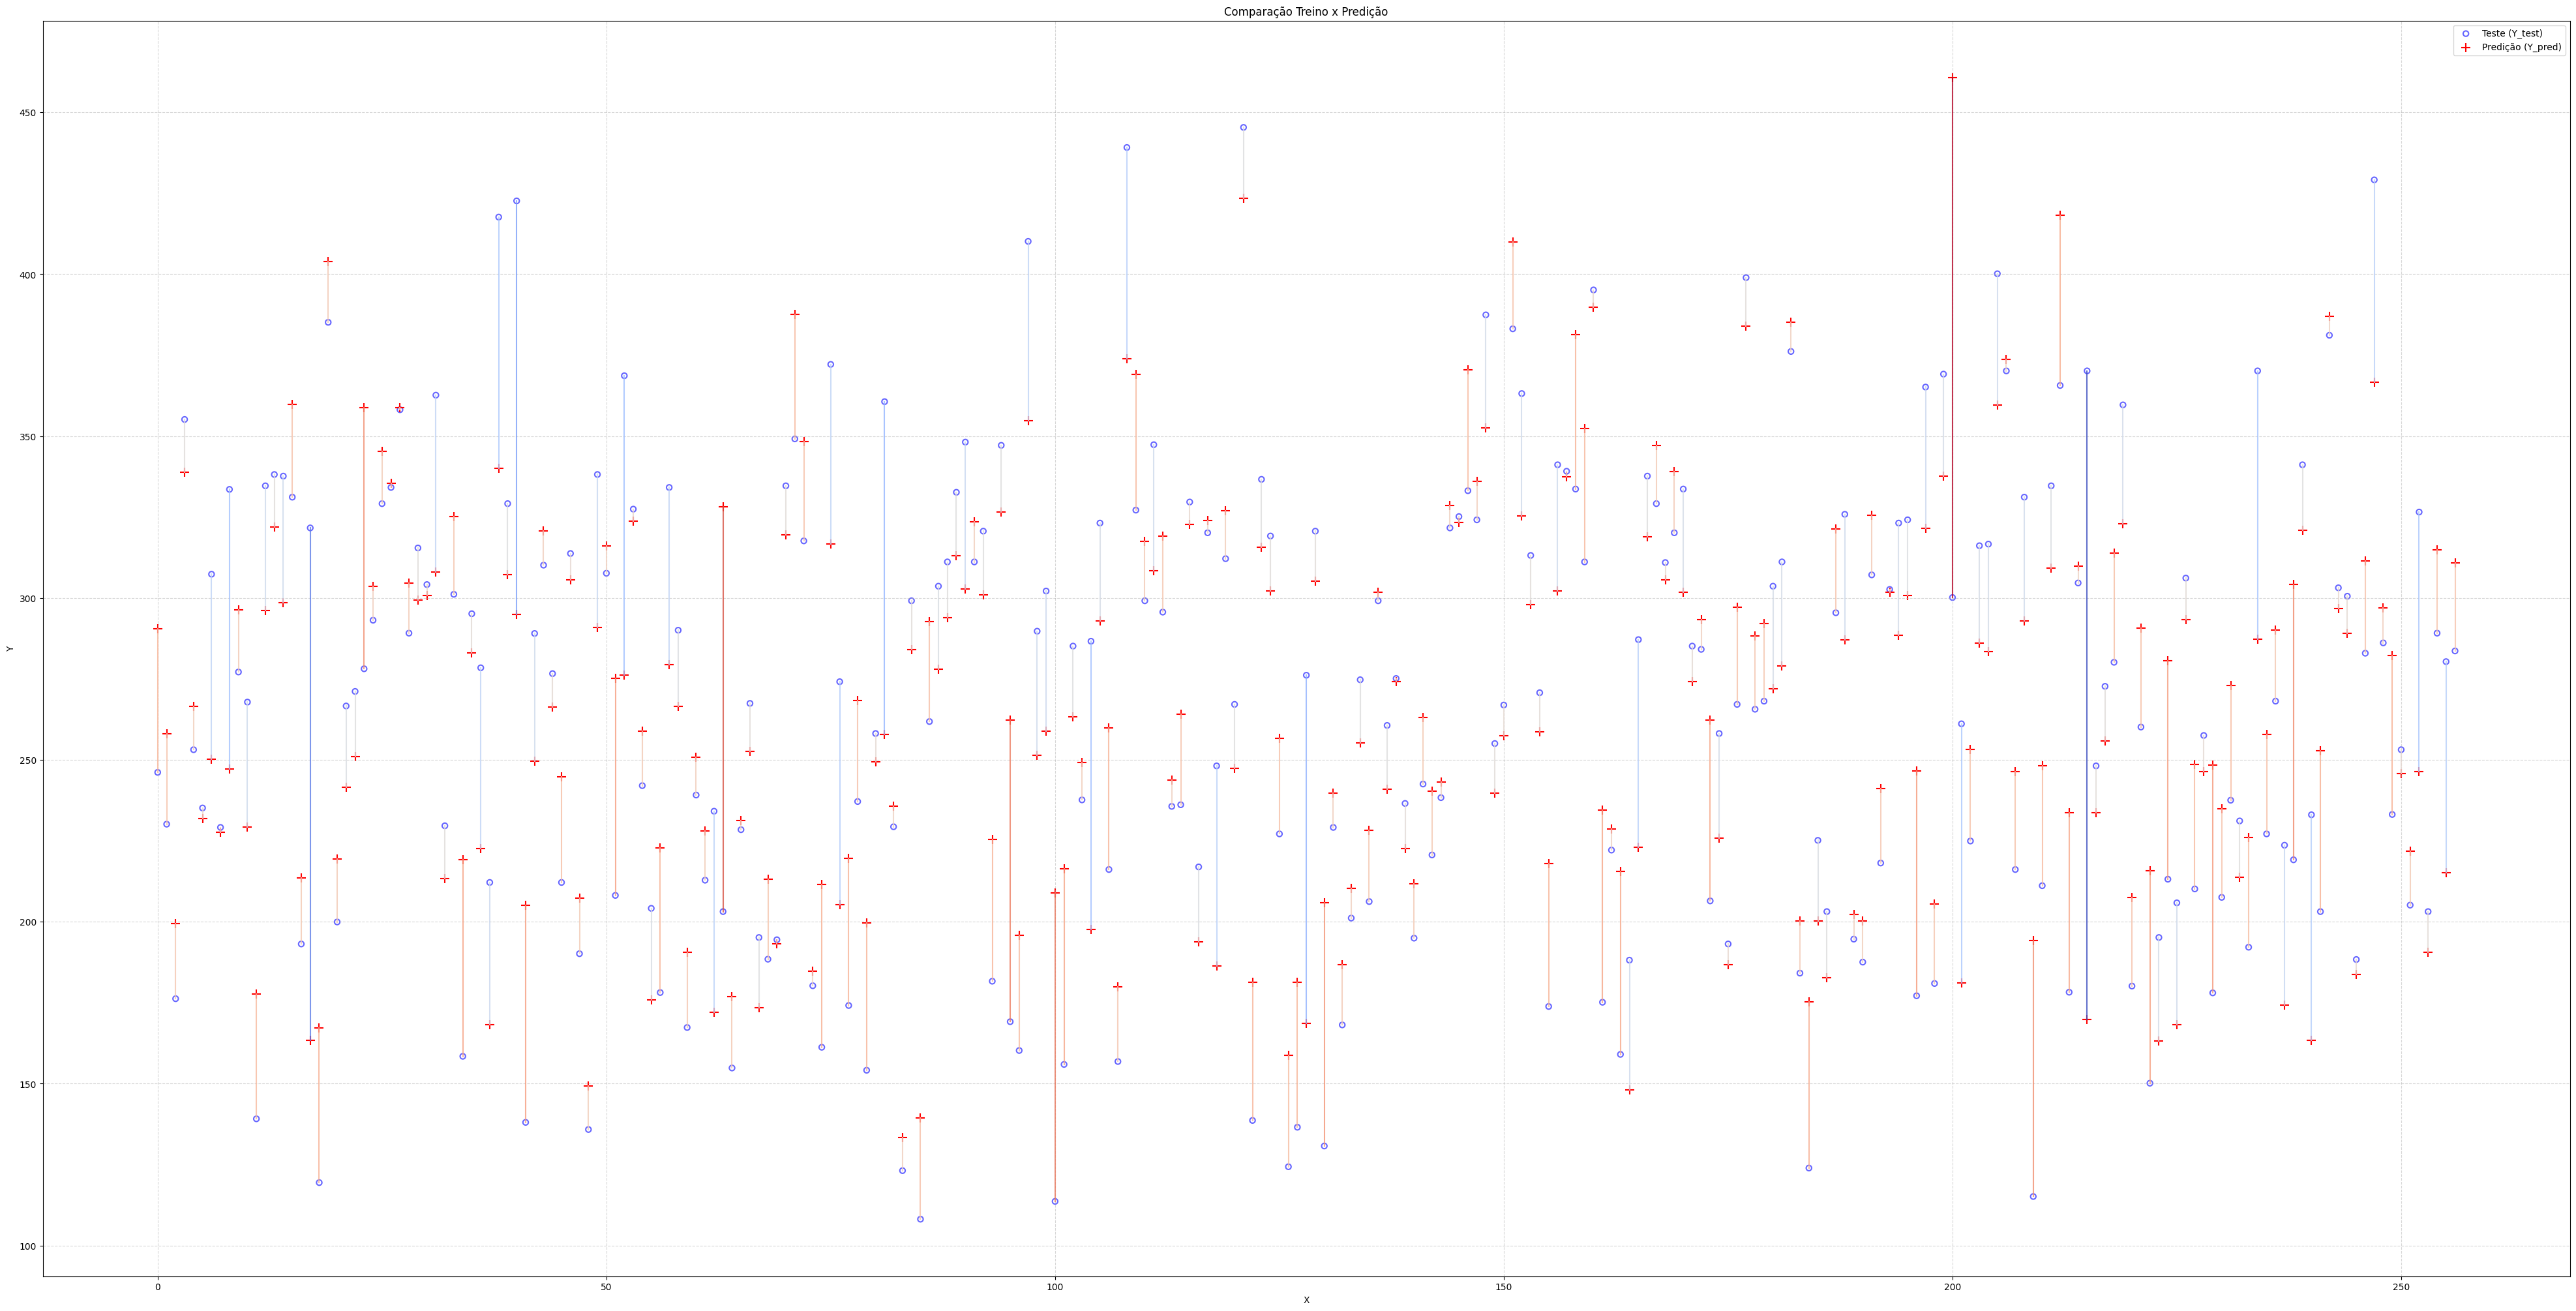

In [12]:
plt.figure(figsize=(50, 25))
x_range = np.arange(0, len(X_test), 1)
plt.scatter(x_range, Y_test, color='blue', alpha=0.6, label='Teste (Y_test)', facecolors='none', edgecolors='blue', linewidths=1.5)
plt.scatter(x_range, pred, color='red', marker='+', label='Predição (Y_pred)', s=100)

diff = pred - Y_test

norm = Normalize(vmin=np.min(diff), vmax=np.max(diff))
cmap = plt.cm.coolwarm  # azul pra negativo, vermelho pra positivo

for x, y_real, y_est, d in zip(x_range, Y_test, pred, diff):
    cor = cmap(norm(d))
    plt.plot([x, x], [y_real, y_est], color=cor, linewidth=1.5, alpha=0.8)

plt.title("Comparação Treino x Predição")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig("LassoResult.png", dpi=300, bbox_inches='tight')
plt.show()

In [13]:
ls_scores = cross_val_score(ls, melting_point['data'], melting_point['target'], cv=10, scoring='neg_mean_absolute_error')
print(ls_scores)
print(ls_scores.mean())
print(ls_scores.std())

[-32.01571596 -29.56172479 -35.10454099 -28.22197725 -31.18270578
 -31.78096403 -32.93929871 -31.03322915 -34.04294784 -30.45519928]
-31.633830376668566
1.9393086752790276


# Elastic Net

In [14]:
encv = ElasticNetCV(alphas=(1000.0, 100.0, 50.0, 10.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0.1, 0.01, 0.005, 0.0025, 0.001, 0.00025), l1_ratio=(0.1, 0.25, 0.5, 0.75, 0.8, 0.9, 1),cv=10, max_iter=10000)

encv.fit(X_train, Y_train)
pred = encv.predict(X_test)

print(encv.alpha_)
print(encv.l1_ratio_)
print("R2 score:", encv.score(X_test, Y_test))
print("Mean Absolute error:", mean_absolute_error(Y_test, pred))

0.1
0.8
R2 score: 0.6407796454066192
Mean Absolute error: 33.21607789779686


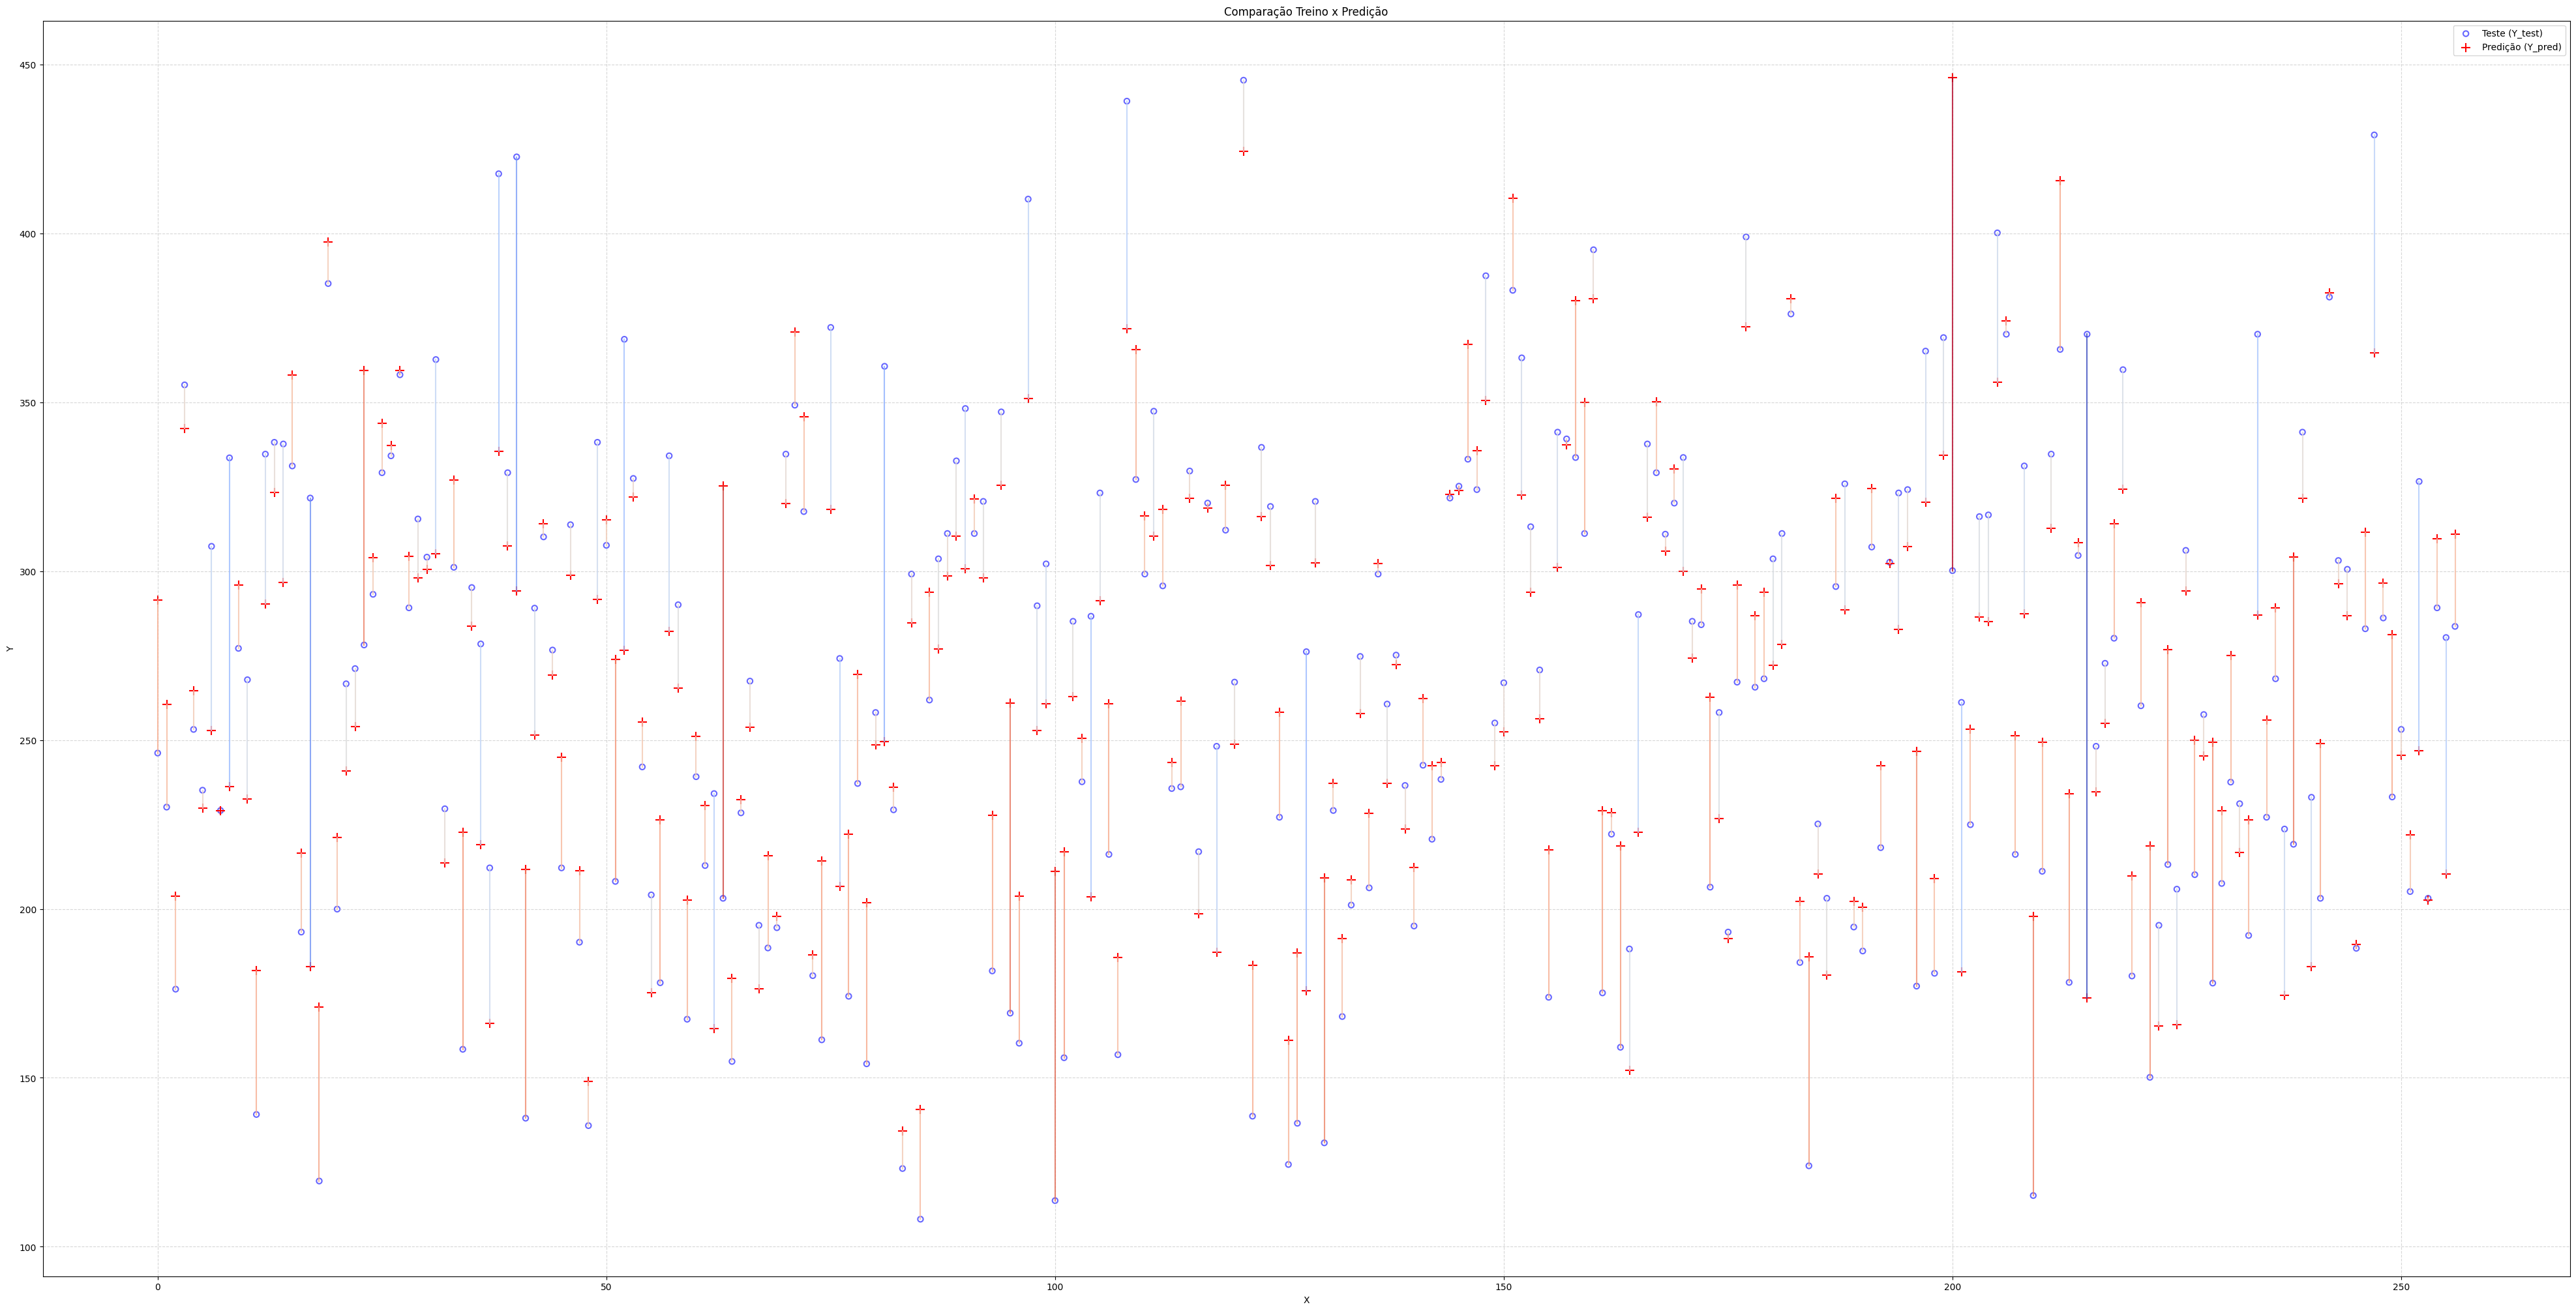

In [15]:
plt.figure(figsize=(50, 25))
x_range = np.arange(0, len(X_test), 1)
plt.scatter(x_range, Y_test, color='blue', alpha=0.6, label='Teste (Y_test)', facecolors='none', edgecolors='blue', linewidths=1.5)
plt.scatter(x_range, pred, color='red', marker='+', label='Predição (Y_pred)', s=100)

diff = pred - Y_test

norm = Normalize(vmin=np.min(diff), vmax=np.max(diff))
cmap = plt.cm.coolwarm  # azul pra negativo, vermelho pra positivo

for x, y_real, y_est, d in zip(x_range, Y_test, pred, diff):
    cor = cmap(norm(d))
    plt.plot([x, x], [y_real, y_est], color=cor, linewidth=1.5, alpha=0.8)

plt.title("Comparação Treino x Predição")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig("ElasticNetResult.png", dpi=300, bbox_inches='tight')
plt.show()

In [16]:
encv_scores = cross_val_score(encv, melting_point['data'], melting_point['target'], cv=10, scoring='neg_mean_absolute_error')
print(encv_scores)
print(encv_scores.mean())
print(encv_scores.std())

D:\puc\ml\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.546e+03, tolerance: 1.051e+03
  model = cd_fast.enet_coordinate_descent_gram(
D:\puc\ml\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.717e+03, tolerance: 1.051e+03
  model = cd_fast.enet_coordinate_descent_gram(
D:\puc\ml\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.849e+03, tolerance: 1.051e+03
  model

[-32.17525143 -30.01808302 -35.05489197 -28.50571821 -31.40710107
 -32.02127696 -33.52161204 -31.27351399 -34.16955716 -30.47282823]
-31.861983408447536
1.8853352823836333


# RANSAC

In [17]:
rs = RANSACRegressor()

rs.fit(X_train, Y_train)
pred = rs.predict(X_test)

print("R2 score:", rs.score(X_test, Y_test))
print("Mean Absolute error:", mean_absolute_error(Y_test, pred))

R2 score: 0.36647289008539985
Mean Absolute error: 39.70640365232994


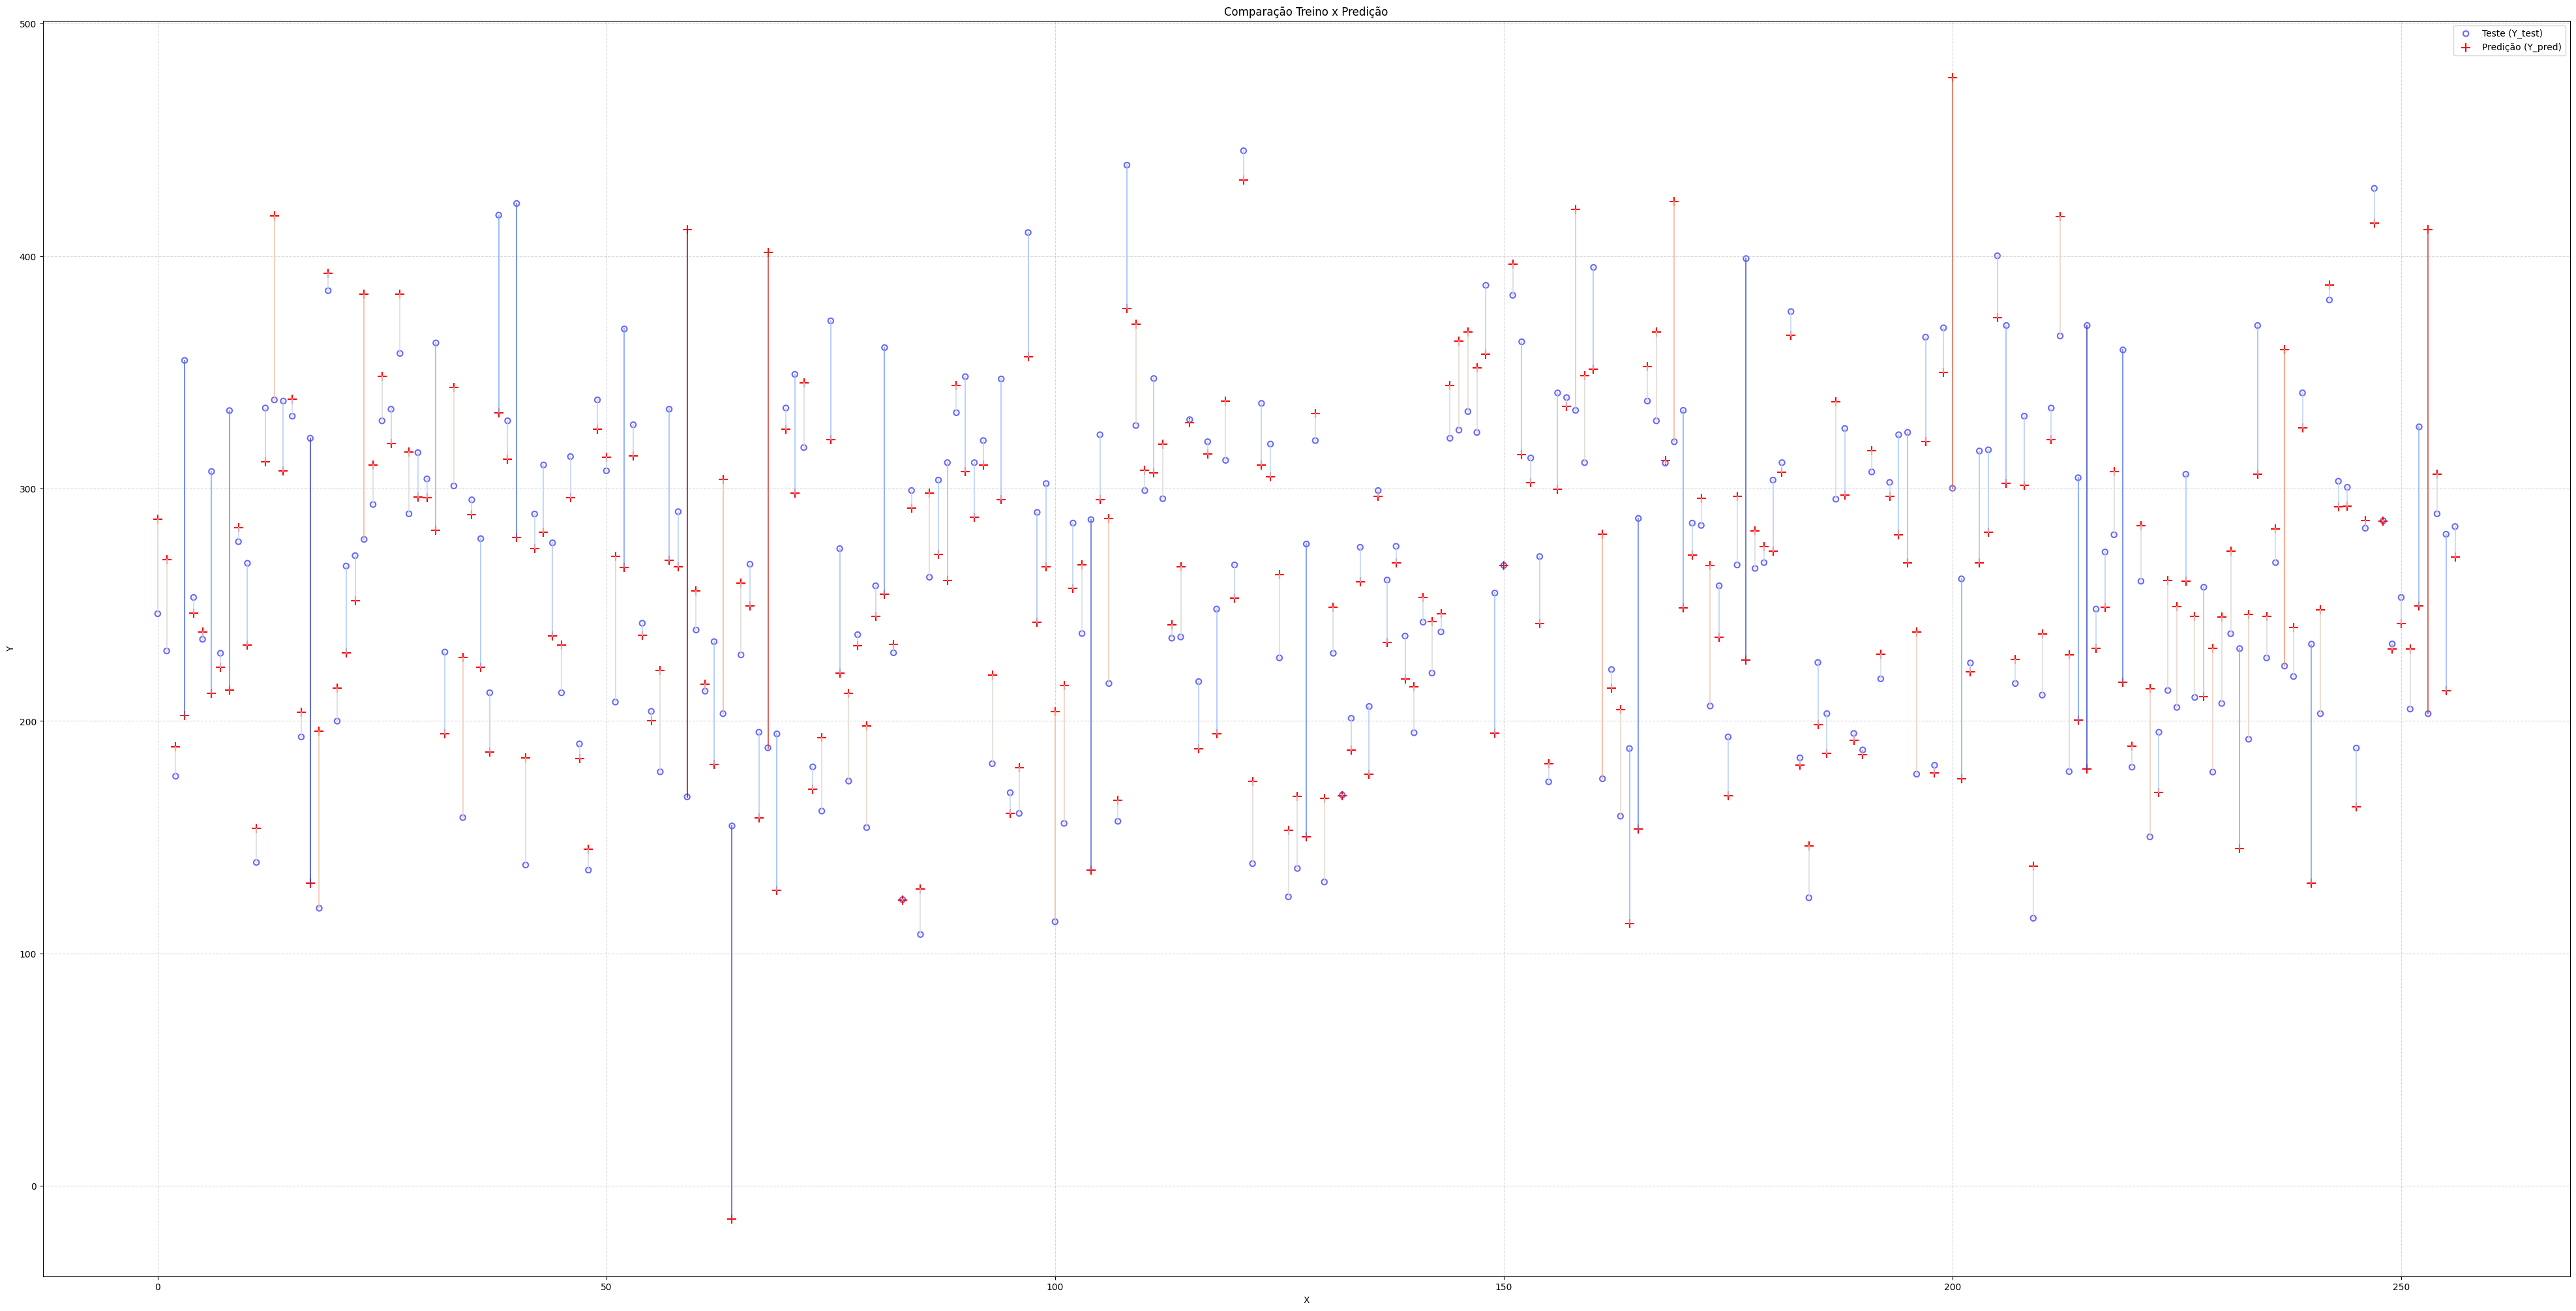

In [18]:
plt.figure(figsize=(50, 25))
x_range = np.arange(0, len(X_test), 1)
plt.scatter(x_range, Y_test, color='blue', alpha=0.6, label='Teste (Y_test)', facecolors='none', edgecolors='blue', linewidths=1.5)
plt.scatter(x_range, pred, color='red', marker='+', label='Predição (Y_pred)', s=100)

diff = pred - Y_test

norm = Normalize(vmin=np.min(diff), vmax=np.max(diff))
cmap = plt.cm.coolwarm  # azul pra negativo, vermelho pra positivo

for x, y_real, y_est, d in zip(x_range, Y_test, pred, diff):
    cor = cmap(norm(d))
    plt.plot([x, x], [y_real, y_est], color=cor, linewidth=1.5, alpha=0.8)

plt.title("Comparação Treino x Predição")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig("RANSACResult.png", dpi=300, bbox_inches='tight')
plt.show()

In [19]:
rs_scores = cross_val_score(rs, melting_point['data'], melting_point['target'], cv=10, scoring='neg_mean_absolute_error')
print(rs_scores)
print(rs_scores.mean())
print(rs_scores.std())

[-43.44032034 -36.55143177 -45.21402954 -33.72644591 -39.94140673
 -34.88600857 -40.18200709 -34.87450388 -36.64991827 -35.81689796]
-38.1282970062711
3.693519456051455


# Huber Regression

In [20]:
hr = HuberRegressor(epsilon=2.0, max_iter=1000)

hr.fit(X_train, Y_train)
pred = hr.predict(X_test)

print("R2 score:", hr.score(X_test, Y_test))
print("Mean Absolute error:", mean_absolute_error(Y_test, pred))

R2 score: 0.5248172176877497
Mean Absolute error: 34.401080605540194


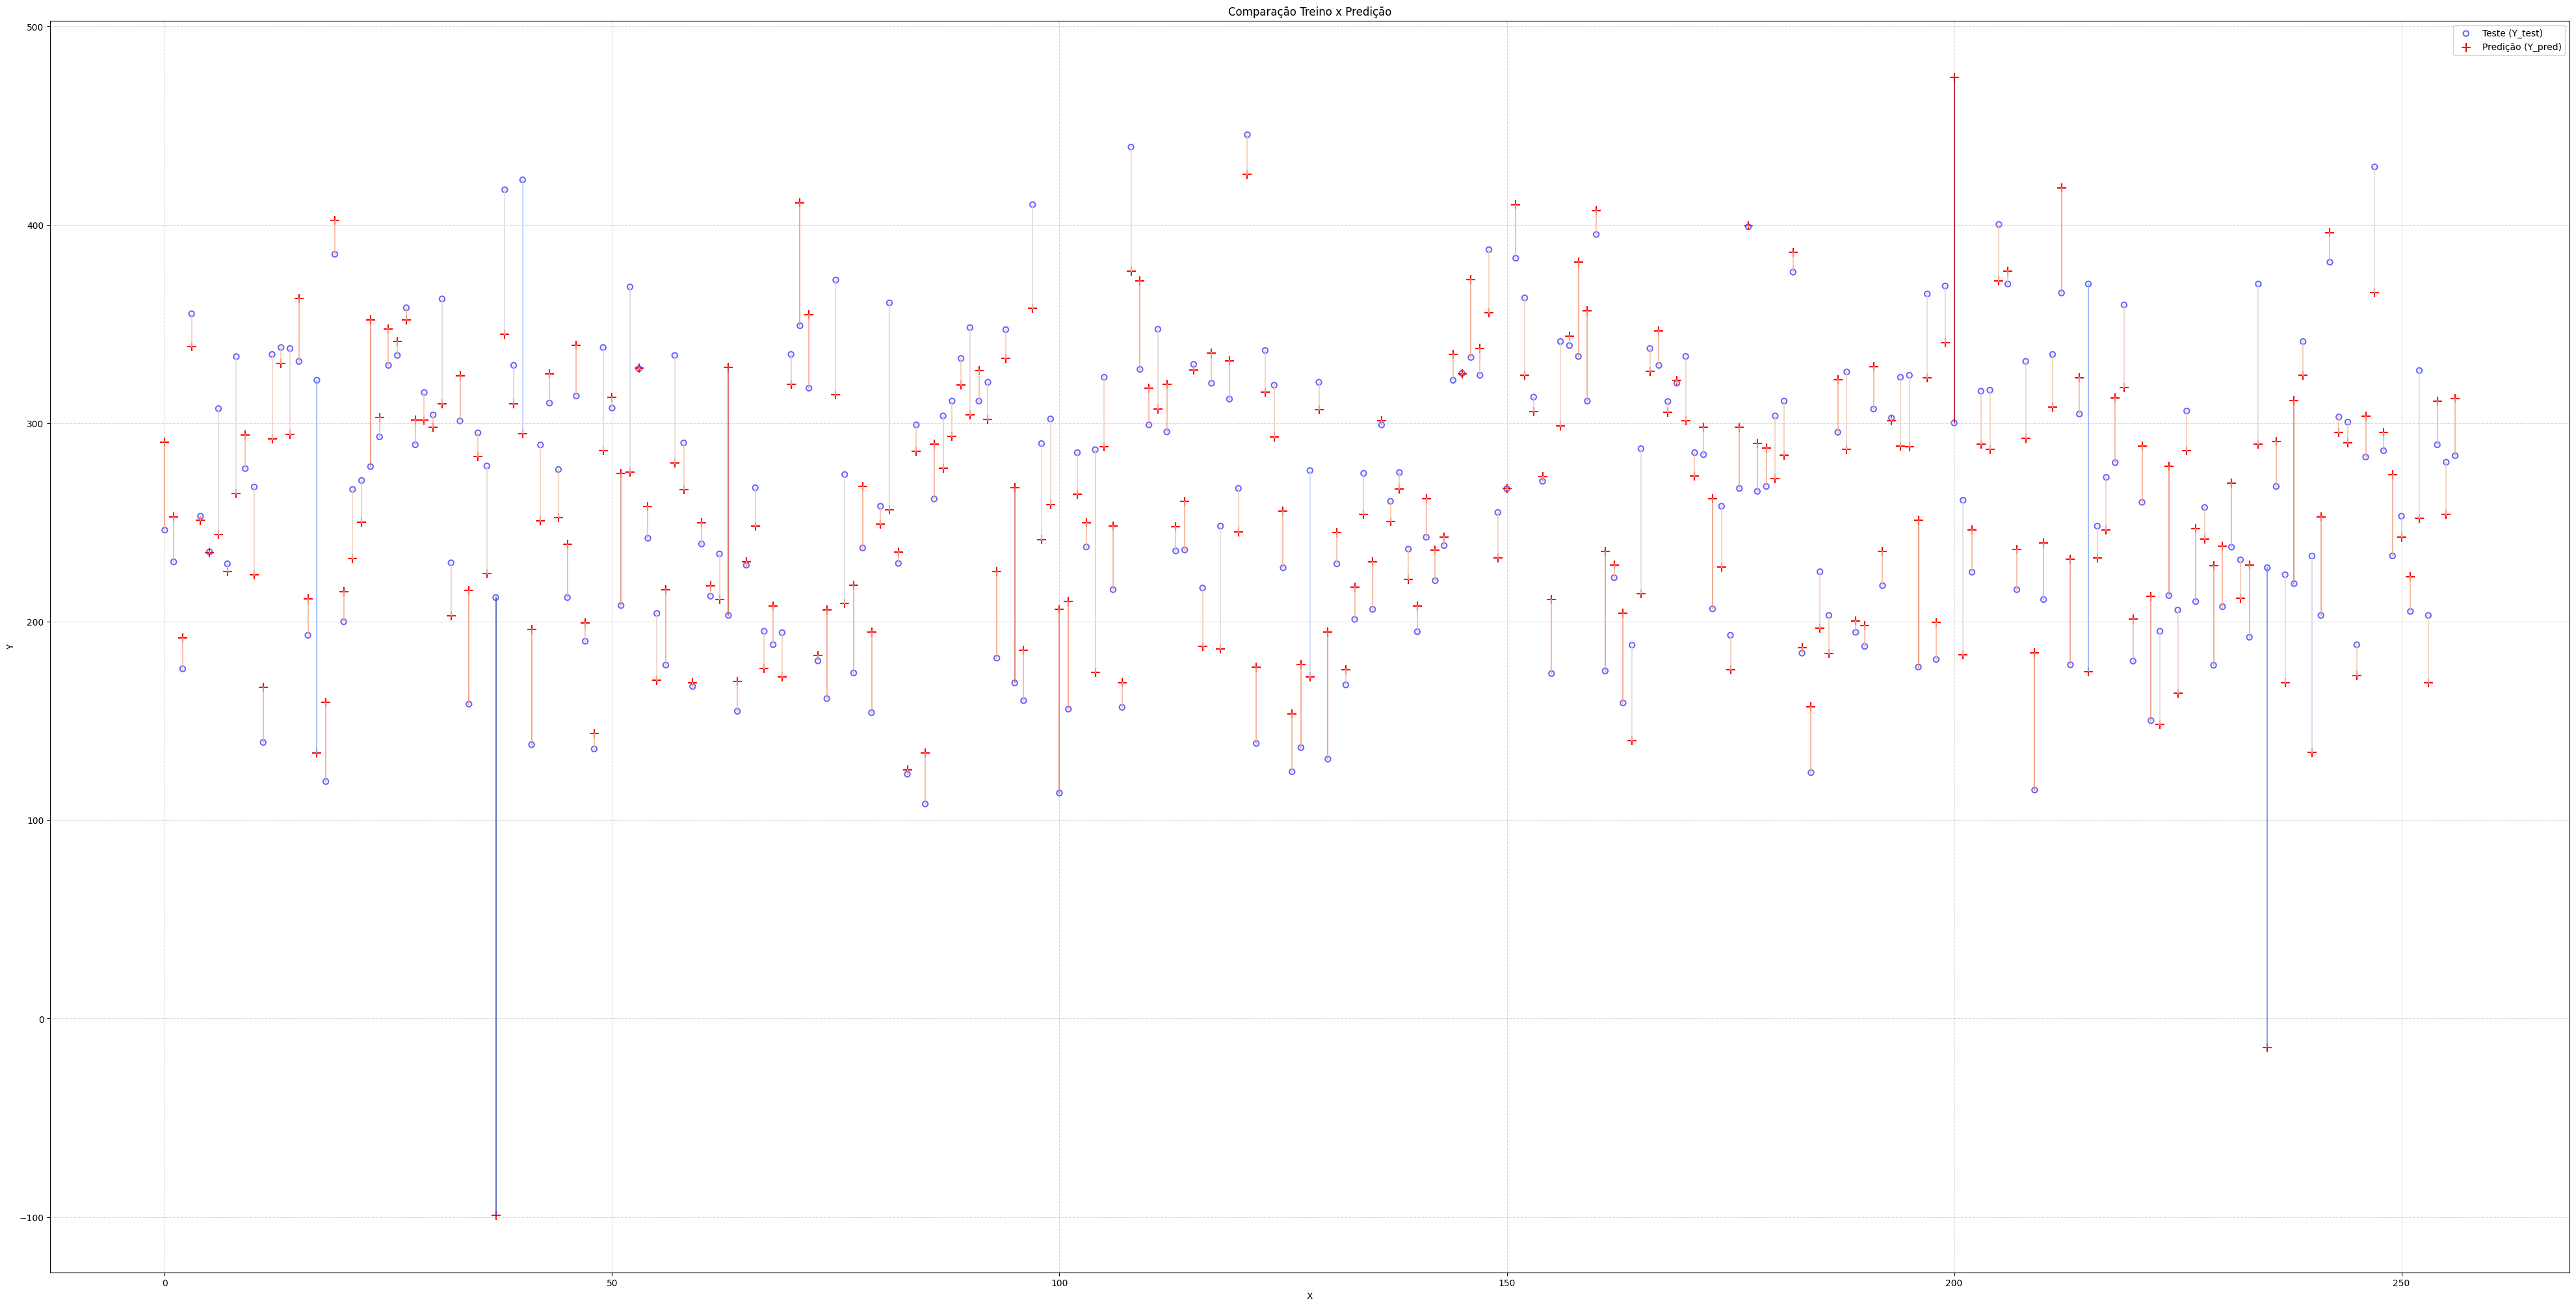

In [21]:
plt.figure(figsize=(50, 25))
x_range = np.arange(0, len(X_test), 1)
plt.scatter(x_range, Y_test, color='blue', alpha=0.6, label='Teste (Y_test)', facecolors='none', edgecolors='blue', linewidths=1.5)
plt.scatter(x_range, pred, color='red', marker='+', label='Predição (Y_pred)', s=100)

diff = pred - Y_test

norm = Normalize(vmin=np.min(diff), vmax=np.max(diff))
cmap = plt.cm.coolwarm  # azul pra negativo, vermelho pra positivo

for x, y_real, y_est, d in zip(x_range, Y_test, pred, diff):
    cor = cmap(norm(d))
    plt.plot([x, x], [y_real, y_est], color=cor, linewidth=1.5, alpha=0.8)

plt.title("Comparação Treino x Predição")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig("HuberResult.png", dpi=300, bbox_inches='tight')
plt.show()

In [22]:
hr_scores = cross_val_score(hr, melting_point['data'], melting_point['target'], cv=10, scoring='neg_mean_absolute_error')
print(hr_scores)
print(hr_scores.mean())
print(hr_scores.std())

[-36.47009249 -35.75527926 -40.54096257 -32.18675815 -37.03917702
 -37.0561518  -43.48886748 -37.05611832 -36.97790799 -38.21282097]
-37.478413605215444
2.807698524493741


# Leaderboard

In [23]:
modelos = {
    "Regressor Linear": lr_scores,
    "Ridge": rg_scores,
    "Lasso": ls_scores,
    "ElasticNet": encv_scores,
    "RANSAC": rs_scores,
    "Huber": hr_scores
}

In [24]:
resultados = []
for nome, score in modelos.items():
    resultados.append({
        "Modelo": nome,
        "Média do Score": score.mean(),
        "Desvio Padrão": score.std()
    })

leaderboard = pd.DataFrame(resultados).sort_values(by="Média do Score", ascending=False)
leaderboard.reset_index(drop=True, inplace=True)

display(leaderboard.style.background_gradient(cmap="Greens").format({"Média do Score": "{:.4f}", "Desvio Padrão": "{:.4f}"}))

,Modelo,Média do Score,Desvio Padrão
0,Lasso,-31.6338,1.9393
1,ElasticNet,-31.8620,1.8853
2,Regressor Linear,-31.8943,2.0291
3,Ridge,-32.0852,1.8931
4,Huber,-37.4784,2.8077
5,RANSAC,-38.1283,3.6935
